In [2]:
import numpy as np
import pandas as pd
import time

In [109]:
def DM_high(frequency):
    if frequency<50.015:
        return 0
    elif frequency<50.1:
        return ((frequency-50.015)/0.085)*0.05
    elif frequency<50.2:
        return 0.05+((frequency-50.1)/0.1)*0.95
    else:
        return 1
    
def DM_low(frequency):
    if frequency>49.985:
        return 0
    elif (frequency>49.9):
        return ((-frequency+49.985)/0.085)*0.05
    elif frequency>49.8:
        return 0.05+((49.9-frequency)/0.1)*0.95
    else:
        return 1
    
def DC_high(frequency):
    if frequency<50.015:
        return 0
    elif frequency<50.2:
        return ((frequency-50.015)/0.185)*0.05
    elif frequency<50.5:
        return 0.05+((frequency-50.2)/0.3)*0.95
    else:
        return 1
    
def DC_low(frequency):
    if frequency>49.985:
        return 0
    elif (frequency>49.8):
        return ((-frequency+49.985)/0.185)*0.05
    elif frequency>49.5:
        return 0.05+((49.8-frequency)/0.3)*0.95
    else:
        return 1

In [118]:
#predict revenue from energy sales

#transform frequency data into EAC response data split between the three services

#load data
data = pd.read_csv('Data/Frequency/fnew-2024-4.csv')
data['dtm'] = pd.to_datetime(data['dtm'])
condition_high = (data['f'] >= 50.015)
condition_low = (data['f'] <= 49.985)

data['DR High %'] = np.minimum(1,condition_high * (data['f']-50.015)/0.1985)
data['DR Low %'] = np.minimum(1,condition_low * (50.015-data['f'])/0.1985)

data['DM High %'] = data['f'].apply(DM_high)
data['DM Low %'] = data['f'].apply(DM_low)

data['DC High %'] = data['f'].apply(DC_high)
data['DC Low %'] = data['f'].apply(DC_low)



In [119]:
data.head()

,dtm,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
0,2024-04-01 00:00:00,50.099,0.423174,-0.0,0.049412,0.0,0.022703,0.0
1,2024-04-01 00:00:01,50.089,0.372796,-0.0,0.043529,0.0,0.020000,0.0
2,2024-04-01 00:00:02,50.074,0.297229,-0.0,0.034706,0.0,0.015946,0.0
3,2024-04-01 00:00:03,50.062,0.236776,-0.0,0.027647,0.0,0.012703,0.0
4,2024-04-01 00:00:04,50.054,0.196474,-0.0,0.022941,0.0,0.010541,0.0


In [120]:
#extract all rows from april 23rd
# Define the date you want to filter by
specific_date = '2024-04-03'

# Filter the DataFrame for the specific date
filtered_df = data[data['dtm'].dt.date == pd.to_datetime(specific_date).date()]

In [121]:
filtered_df.head()

,dtm,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
172800,2024-04-03 00:00:00,50.133,0.594458,-0.0,0.363500,0.0,0.031892,0.0
172801,2024-04-03 00:00:01,50.121,0.534005,-0.0,0.249500,0.0,0.028649,0.0
172802,2024-04-03 00:00:02,50.110,0.478589,-0.0,0.145000,0.0,0.025676,0.0
172803,2024-04-03 00:00:03,50.099,0.423174,-0.0,0.049412,0.0,0.022703,0.0
172804,2024-04-03 00:00:04,50.095,0.403023,-0.0,0.047059,0.0,0.021622,0.0


In [122]:
#group by hour
filtered_df['hour'] = filtered_df['dtm'].dt.hour
april_3rd = filtered_df.groupby('hour').mean()

/var/folders/dq/5f21rw_12wb2gcspzdyc45fw0000gn/T/ipykernel_4455/925006241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['dtm'].dt.hour


In [ ]:
p

In [124]:
april_3rd.head(24)

,dtm,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
hour,,,,,,,,
0,2024-04-03 00:29:59.500000256,49.989550,0.082965,0.202254,0.015193,0.017841,0.004451,0.006745
1,2024-04-03 01:29:59.500000000,49.949550,0.013669,0.339110,0.001596,0.059163,0.000733,0.012150
2,2024-04-03 02:29:59.500000000,49.958279,0.013132,0.291816,0.001533,0.029915,0.000705,0.009529
3,2024-04-03 03:29:59.500000000,49.984087,0.095684,0.249681,0.020020,0.018084,0.005133,0.008242
4,2024-04-03 04:29:59.500000000,50.014113,0.202256,0.204194,0.069269,0.035988,0.010851,0.007615
5,2024-04-03 05:29:59.500000000,49.994802,0.117028,0.215908,0.015818,0.061221,0.006278,0.008191
6,2024-04-03 06:29:59.500000000,50.014947,0.099734,0.091524,0.024545,0.005860,0.005351,0.002638
7,2024-04-03 07:29:59.500000000,49.999973,0.082838,0.151693,0.017545,0.008895,0.004444,0.004053
8,2024-04-03 08:29:59.500000256,50.012730,0.109275,0.111320,0.019597,0.005890,0.005862,0.002706


<Axes: >

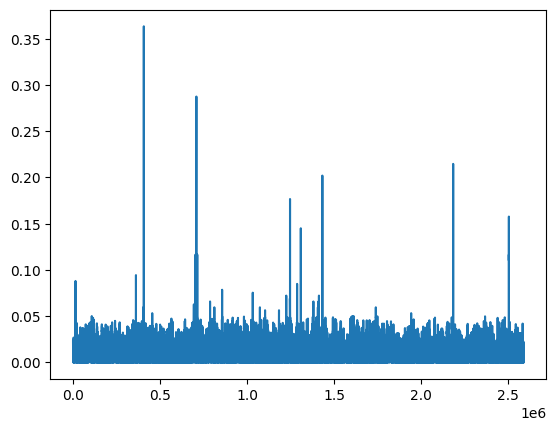

In [112]:
data['DC High %'].plot()